# CS437-591-Machine Learning & Soft Computing

# Assignment 10: Boosting

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
from __future__ import print_function
import os
import warnings
data_path = ['data']
warnings.filterwarnings('ignore')

## Question 1
We first import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
* Determine if the float columns need to be scaled.

In [2]:
import pandas as pd
import numpy as np

#filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
filepath = os.sep.join(['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
df = pd.read_csv(filepath, sep=',')

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df.shape

(7352, 563)

In [5]:
df.dtypes.value_counts()

float64    561
int64        1
object       1
dtype: int64

In [7]:
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

##Write your answer here

Scaling is not needed since Decision tree classification model does not require scaling.

## Question 2

* Integer encode the activities.
* Split the data into train and test data sets. 

In [10]:
#write your code here
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['Activity'] = lab.fit_transform(df['Activity'])
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


In [13]:
df.Activity.value_counts()


0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: Activity, dtype: int64

In [14]:
df.dtypes.value_counts()

float64    561
int64        2
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

feature_col = [x for x in df.columns if x!= 'Activity']
X = df[feature_col]
y = df['Activity']

#write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.33, random_state=42)

## Question 3

* Fit gradient boosted tree models with all parameters set to their defaults the following tree numbers (`n_estimators = [25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models. 
* Plot the accuracy as a function of estimator number.

**Note:** This question may take some time to execute, depending on how many different values are fit for estimators. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.


In [26]:
#write your code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

list_n_estimators = [25,50,100,200,400]

errors_li = list()
accuracy_li = list()

for i in list_n_estimators:
    gbc = GradientBoostingClassifier(n_estimators=i,max_features=4, random_state=42).fit(X_train, Y_train)
    y_predict = gbc.predict(X_test)
    acc = accuracy_score(Y_test,y_predict)
    error = 1. - acc
    errors_li.append(pd.Series({'Number of trees' :i,'Error':error}))
    accuracy_li.append(pd.Series({'Number of trees' :i,'Accuracy':acc}))
    
errors_li_df = pd.concat(errors_li,axis = 1).T.set_index('Number of trees')
errors_li_df
    

,Error
Number of trees,
25.0,0.086939
50.0,0.046560
100.0,0.025546
200.0,0.016481
400.0,0.011125


In [27]:
accuracy_li_df = pd.concat(accuracy_li,axis = 1).T.set_index('Number of trees')
accuracy_li_df

,Accuracy
Number of trees,
25.0,0.913061
50.0,0.953440
100.0,0.974454
200.0,0.983519
400.0,0.988875


In [28]:
import seaborn as sns
import matplotlib as plt

%matplotlib inline

<AxesSubplot:xlabel='Number of trees', ylabel='Error'>

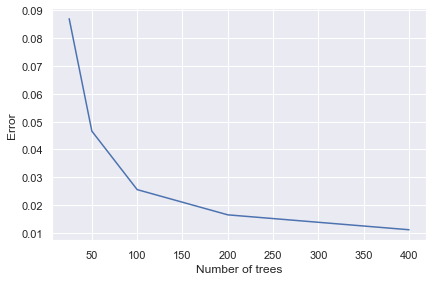

In [30]:
sns.set_context('notebook')
sns.set_palette('plasma')
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(6.7,4.27)})

#write your code here
sns.lineplot(data = errors_li_df,x='Number of trees',y='Error')

<AxesSubplot:xlabel='Number of trees', ylabel='Accuracy'>

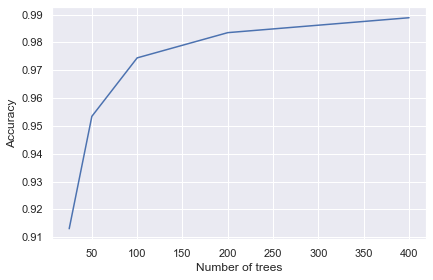

In [31]:
sns.lineplot(data = accuracy_li_df,x='Number of trees',y='Accuracy')

## Question 4

* Using a grid search with cross-validation, fit a new gradient boosted classifier with the a list of estimators, similar to question 3. Also consider  varying the learning rates (0.1, 0.01, 0.001, etc.), and the number of maximum features (1, 2, etc.).
* Examine the parameters of the best fit model.
* Calculate relevant error metrics on this model and examine the confusion matrix.

**Note:** this question may take some time to execute, depending on how many features are associated with the grid search. It is recommended to start with only a few to ensure everything is working correctly and then add more features. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

In [52]:
#write your code here
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(GradientBoostingClassifier(n_estimators=i,max_features=4, random_state=42),param_grid={'n_estimators':[200,400],'learning_rate':[0.1]},scoring = 'accuracy',n_jobs=1)



In [53]:
#fit your model
gsc.fit(X_train,Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                  n_estimators=400,
                                                  random_state=42),
             n_jobs=1,
             param_grid={'learning_rate': [0.1], 'n_estimators': [200, 400]},
             scoring='accuracy')

In [54]:
#see the best estimator
gsc.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42)

In [55]:
from sklearn.metrics import classification_report
#write your code to generate the classification report

y_predict = gsc.predict(X_test)
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       0.98      0.96      0.97       434
           2       0.96      0.98      0.97       445
           3       1.00      1.00      1.00       405
           4       1.00      1.00      1.00       345
           5       0.99      1.00      0.99       331

    accuracy                           0.99      2427
   macro avg       0.99      0.99      0.99      2427
weighted avg       0.99      0.99      0.99      2427



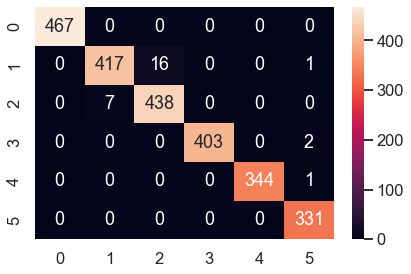

In [56]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')

cm =confusion_matrix(Y_test,y_predict)   #modify this line to generate confusion matrix for the heatmap
axs = sns.heatmap(cm, annot=True, fmt = 'd')

## Question 5 (Optional)

* Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.
* Compare the errors from AdaBoost to those from the GradientBoostedClassifier.

**NOTE:** Setting `max_features=4` in the decision tree classifier used as the base classifier for AdaBoost will increase the convergence rate.

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#write your code

gsc1 = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_features=4),n_estimators=i, random_state=42),param_grid={'n_estimators':[200,400],'learning_rate':[0.1,0.01,0.001]},scoring = 'accuracy')

gsc1.fit(X_train,Y_train)
y_predict = gsc1.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
#write your code to generate the classification report

y_predict = gsc.predict(X_test)
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       0.98      0.96      0.97       434
           2       0.96      0.98      0.97       445
           3       1.00      1.00      1.00       405
           4       1.00      1.00      1.00       345
           5       0.99      1.00      0.99       331

    accuracy                           0.99      2427
   macro avg       0.99      0.99      0.99      2427
weighted avg       0.99      0.99      0.99      2427



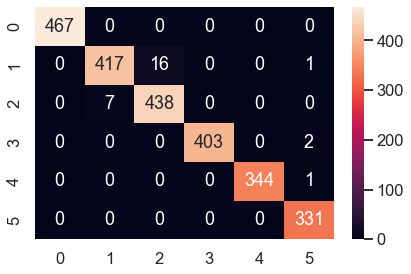

In [75]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')

cm =confusion_matrix(Y_test,y_predict)   #modify this line to generate confusion matrix for the heatmap
axs = sns.heatmap(cm, annot=True, fmt = 'd')